In [154]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from celluloid import Camera
# each animaiton class is made up from the actual sklearn Class
# this way I don't have to recreate the entire implementation
# and I'm able to call things like I'm used to (fit, score, etc.)
# and also I just have to create two new functions -> animate_training
# and plot_decision_boundary
class KNN_animation(KNeighborsClassifier):
    def __init__(self):
        super().__init__()
        
    
    def plot_decision_boundary(self, x, y, fig, ax, cam):
        
        cm = plt.cm.RdBu # colormap
        cm_bright = ListedColormap(['#FF0000', '#0000FF']) # cm params
        x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
        y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, .002),
                                np.arange(y_min, y_max, .002))
        Z = self.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        # y_pred = model.predict(x_test)
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        cam.snap()
        
    def animate_training(self, x_train, y_train):
        print((self.n_neighbors))
        fig, ax = plt.subplots()
        cam = Camera(fig)
        for i in range(len(x_train)):
            if i <= self.n_neighbors:
                pass
            else:
                print(i)
                self.fit(x_train[:i+1], y_train[:i+1])
                self.plot_decision_boundary(x_train[:i+1], y_train[:i+1], fig, ax, cam)
        return cam

In [155]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

dataset = load_iris()
df = pd.DataFrame(dataset.data)
X = df[[0, 1]].values
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=45)


In [156]:
knn_anim = KNN_animation()

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


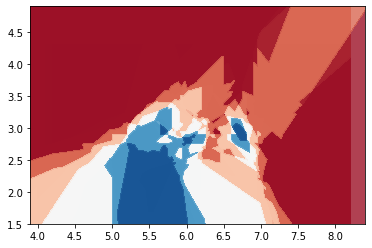

In [157]:
aaa = knn_anim.animate_training(X_train, y_train)

In [158]:
from IPython.display import HTML
anim = aaa.animate()
HTML(anim.to_html5_video())